In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.pipeline import Pipeline
random_state = 7
from sklearn.impute import SimpleImputer, KNNImputer
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

In [2]:
path = './AML_data/'
X = joblib.load('./AML_data/meth.pkl')
phenodf = joblib.load('./AML_data/pheno.pkl')

In [3]:
unionindices = joblib.load('./AML_data/unionindices.pkl')
len(unionindices)

1300

In [4]:
phenodf.genotype.unique()

array(['normal', 't(11;19)', nan, 'mono 7', 'inv(16)', 't(9;11)',
       'other clon abn', 'other 11q23/MLL', 't(10;11)', '3q21q26',
       't(8;21)', 'sole+8', 't(15;17)', 'no result'], dtype=object)

In [5]:
len(phenodf.genotype.unique())

14

In [6]:
mll = ['other 11q23/MLL', 't(9;11)', 't(10;11)','t(11;19)']
other = ['normal', 'mono 7', 'inv(16)','other clon abn', '3q21q26', 't(8;21)', 'sole+8', 't(15;17)']

In [7]:
finalgenotype = []

for data in phenodf.genotype:

    if data in mll:
        finalgenotype.append('MLL rearranged')
        
    elif data == 'no result':
        finalgenotype.append('No result')
        
    elif data in other:
        finalgenotype.append(data)
        
    else:
        finalgenotype.append('No result')
        

In [8]:
finalgenotype

['normal',
 'MLL rearranged',
 'normal',
 'No result',
 'mono 7',
 'inv(16)',
 'normal',
 'normal',
 'MLL rearranged',
 'other clon abn',
 'other clon abn',
 'MLL rearranged',
 'normal',
 'MLL rearranged',
 'MLL rearranged',
 'MLL rearranged',
 'other clon abn',
 'MLL rearranged',
 'normal',
 'No result',
 'MLL rearranged',
 'normal',
 'MLL rearranged',
 '3q21q26',
 'normal',
 'other clon abn',
 'other clon abn',
 'inv(16)',
 'No result',
 't(8;21)',
 'sole+8',
 'sole+8',
 'normal',
 'normal',
 'No result',
 'other clon abn',
 'mono 7',
 't(8;21)',
 'normal',
 'inv(16)',
 'No result',
 't(8;21)',
 'MLL rearranged',
 'MLL rearranged',
 'normal',
 'No result',
 'normal',
 't(15;17)',
 'No result',
 'other clon abn',
 'normal',
 'other clon abn',
 'inv(16)',
 'inv(16)',
 't(8;21)',
 'MLL rearranged',
 't(8;21)',
 't(8;21)',
 'normal',
 'normal',
 't(8;21)',
 't(15;17)',
 'No result',
 'MLL rearranged',
 'MLL rearranged',
 'MLL rearranged',
 'inv(16)',
 'No result',
 't(8;21)',
 'No result

In [9]:
phenodf['finalgenotype'] = finalgenotype

In [10]:
phenodf[['genotype', 'finalgenotype']].head(20)

,genotype,finalgenotype
public_id,,
AML_001,normal,normal
AML_002,t(11;19),MLL rearranged
AML_003,normal,normal
AML_004_r,NaN,No result
AML_005,mono 7,mono 7
AML_006,inv(16),inv(16)
AML_007,normal,normal
AML_008,normal,normal
AML_009,t(9;11),MLL rearranged


In [11]:
len(phenodf.finalgenotype.unique())

10

In [12]:
phenodf.finalgenotype.value_counts()

normal            30
MLL rearranged    25
other clon abn    23
No result         20
t(8;21)           19
inv(16)           12
mono 7             5
t(15;17)           4
sole+8             3
3q21q26            1
Name: finalgenotype, dtype: int64

In [13]:
unknowndf = phenodf[phenodf['finalgenotype'].isin(['No result', 'other clon abn'])]

In [14]:
Xun = X[X.index.get_level_values(1).isin(unknowndf.index)]

In [15]:
phenodf = phenodf[~phenodf['finalgenotype'].isin(['No result', 'other clon abn'])]

In [16]:
phenodf.finalgenotype.value_counts()

normal            30
MLL rearranged    25
t(8;21)           19
inv(16)           12
mono 7             5
t(15;17)           4
sole+8             3
3q21q26            1
Name: finalgenotype, dtype: int64

In [17]:
X = X[X.index.get_level_values(1).isin(phenodf.index)]

In [18]:
X.shape

(99, 406830)

In [19]:
Xtrain, Xtest, ytrain, ytest= train_test_split(X, phenodf.finalgenotype, test_size = 0.33, random_state = 6)
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

(66, 406830) (33, 406830) (66,) (33,)


In [20]:
Xtrain = Xtrain[unionindices]
Xtest = Xtest[unionindices]

In [21]:
Xtrain.shape

(66, 1300)

In [22]:
Xtest.shape

(33, 1300)

In [23]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(Xtrain)
XtrainN = pd.DataFrame(imp.transform(Xtrain), columns = Xtrain.columns, index = Xtrain.index)
XtestN = pd.DataFrame(imp.transform(Xtest), columns = Xtest.columns, index = Xtest.index)


In [24]:
ytrain = pd.DataFrame(ytrain, columns = ['finalgenotype'], index = ytrain.index)
ytest = pd.DataFrame(ytest, columns = ['finalgenotype'], index = ytest.index)


In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
encoder = LabelEncoder()
encoder.fit(ytrain)
encoded_ytrain = encoder.transform(ytrain)
encoded_ytest = encoder.transform(ytest)

dummy_ytrain = np_utils.to_categorical(encoded_ytrain)
dummy_yest = np_utils.to_categorical(encoded_ytest)


C:\Users\olgkr928\Anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [27]:
ytrain['classes'] = encoded_ytrain
ytest['classes'] = encoded_ytest

In [28]:
ytrain

,finalgenotype,classes
public_id,,
AML_110,inv(16),2
AML_051,inv(16),2
AML_100,t(8;21),7
AML_015,MLL rearranged,1
AML_123,inv(16),2
...,...,...
AML_047,t(8;21),7
AML_109,mono 7,3
AML_104,normal,4


In [29]:
def baseline_model(input_dim = len(unionindices),
                   out = len(phenodf.finalgenotype.unique()),
                   activation = 'sigmoid',
                   dim1 = 100,
                   dim2 = 50,
                   optimizer = 'rmsprop'):
    model = Sequential()
    model.add(Dense(dim1, input_dim=input_dim, activation=activation)) 
    model.add(Dense(dim2, input_dim=dim1, activation=activation))
    model.add(Dense(out, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [30]:
from keras.models import load_model
# # # Instantiate the model as you please (we are not going to use this)

bestmodel = joblib.load('./AML_data/sklearn_pipelineDLClassificationFITTED.pkl')
bestmodel.named_steps['NeuralNetwork'].model = load_model('./AML_data/DLSubtype_ClassificationHyperoptAlldataFITTED.h5')                      



In [31]:
bestmodel.get_params()

{'memory': None,
 'steps': [('NeuralNetwork',
   <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier at 0x22658890d30>)],
 'verbose': False,
 'NeuralNetwork': <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier at 0x22658890d30>,
 'NeuralNetwork__verbose': 1,
 'NeuralNetwork__activation': 'sigmoid',
 'NeuralNetwork__batch_size': 8,
 'NeuralNetwork__dim1': 200,
 'NeuralNetwork__epochs': 100,
 'NeuralNetwork__build_fn': <function __main__.baseline_model(input_dim=1300, out=8, activation='sigmoid', dim1=100, dim2=50, optimizer='rmsprop')>}

In [32]:
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix, roc_curve, auc, confusion_matrix, precision_score

# Predict test data

In [33]:
preds = bestmodel.predict(XtestN.values)


C:\Users\olgkr928\Anaconda3\envs\myenv\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


5/5 [==============================] - 0s 0s/step


In [34]:
ytest['preds'] = preds

In [35]:
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix, roc_curve, auc, confusion_matrix, precision_score

In [36]:
accuracy_score(ytest.classes, ytest.preds)

0.9090909090909091

In [37]:
sum(ytest.classes == ytest.preds)

30

In [38]:
cm = confusion_matrix(ytest.classes, ytest.preds)

In [39]:
classes = list(np.arange(1,len(ytest.classes.unique())+1))

In [40]:
target_names = {}

for i, j in zip(ytest['classes'].unique(), ytest['finalgenotype'].unique()):
    target_names[j] = i

In [41]:
st = dict(sorted(target_names.items(), key = lambda item: item[1]))

In [42]:
from sklearn.metrics import classification_report

In [43]:
st

{'MLL rearranged': 1,
 'inv(16)': 2,
 'mono 7': 3,
 'normal': 4,
 'sole+8': 5,
 't(15;17)': 6,
 't(8;21)': 7}

In [44]:
print(classification_report(ytest.classes, ytest.preds, target_names = st.keys()))

                precision    recall  f1-score   support

MLL rearranged       1.00      0.91      0.95        11
       inv(16)       1.00      1.00      1.00         3
        mono 7       1.00      1.00      1.00         1
        normal       0.78      0.88      0.82         8
        sole+8       0.00      0.00      0.00         1
      t(15;17)       0.67      1.00      0.80         2
       t(8;21)       1.00      1.00      1.00         7

      accuracy                           0.91        33
     macro avg       0.78      0.83      0.80        33
  weighted avg       0.90      0.91      0.90        33



C:\Users\olgkr928\Anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
hor, ver = cm.shape

labels = list(st.keys())

xticks = [float(h)+0.5 for h in list(range(hor))]

yticks = [float(v)+0.5 for v in list(range(ver))]


In [46]:
#imagepath = './images/'

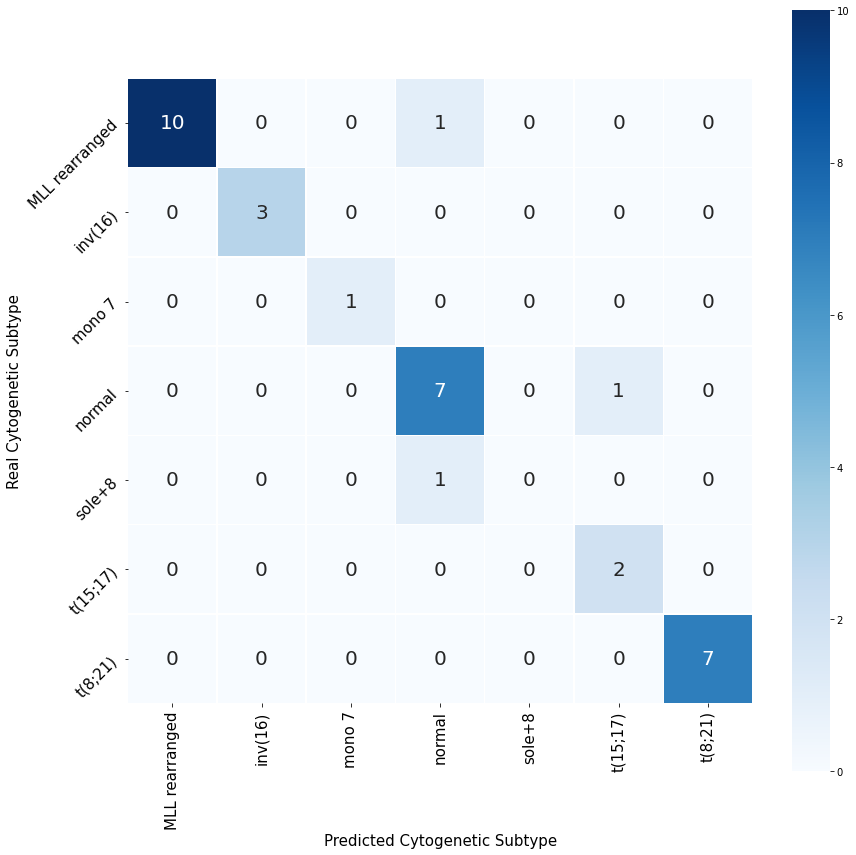

In [47]:
plt.figure(figsize=(14,14))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues',  annot_kws = {'fontsize' : 20})
plt.ylabel('Real Cytogenetic Subtype', fontsize = 15);
plt.xlabel('Predicted Cytogenetic Subtype', fontsize = 15);
#all_sample_title = 'Confusion Matrix for the Real vs Predicted Subtypes'
plt.xticks(xticks, labels[:hor], rotation = 90, fontsize = 15)
plt.yticks(yticks, labels[:ver], rotation = 45, fontsize = 15)
#plt.title(all_sample_title, size = 20)
#plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig(imagepath + 'ConfusionMatrixALL.svg',dpi = 300)
plt.show()